*The Disneyland Project*
The dataset that we're working with in this project is taken from https://www.kaggle.com/datasets/arushchillar/disneyland-reviews, "Disneyland Reviews, reviews and ratings of 3 Disneyland branches - California, Hong Kong and Paris”. 

The dataset provides 42,000 reviews of 3 Disneyland branches - Paris, California and Hong Kong, posted by visitors on Trip Advisor, including review id, rating, when the reviewer visited the theme park, country of origin of visitor, comments made by visitor, and location of Disneyland park.

In [45]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [46]:
#İmporting basic libraries
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [47]:
# Load the dataset
url = "https://www.kaggle.com/datasets/arushchillar/disneyland-reviews/data"
# Download the dataset manually and load it, as the direct link might not work due to Kaggle's terms

# Downloaded the dataset, load it
df = pd.read_csv("/Users/oyuesan/Desktop/disneyland.csv")

In [48]:
#Defining the dataset
disneyland_df = pd.read_csv("/Users/oyuesan/Desktop/disneyland.csv")
df = disneyland_df.copy()

In [49]:
#Clean the dataset
disneyland_df.dropna(inplace=True)

In [50]:
#Display the first few rows of the dataset
disneyland_df.head()

,ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,Apr-19,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,May-19,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,Apr-19,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,Apr-19,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,Apr-19,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [51]:
#Generate information about all the columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [52]:
#Show the number of rows, the number of columns
df.shape

(42656, 6)

In [53]:
#Removing Nulls & Duplicates
df.pop("ID")

0        670772142
1        670682799
2        670623270
3        670607911
4        670607296
           ...    
42651      1765031
42652      1659553
42653      1645894
42654      1618637
42655      1536786
Name: ID, Length: 42656, dtype: int64

In [54]:
df.head()

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,4,Apr-19,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,4,May-19,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,4,Apr-19,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,4,Apr-19,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,4,Apr-19,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


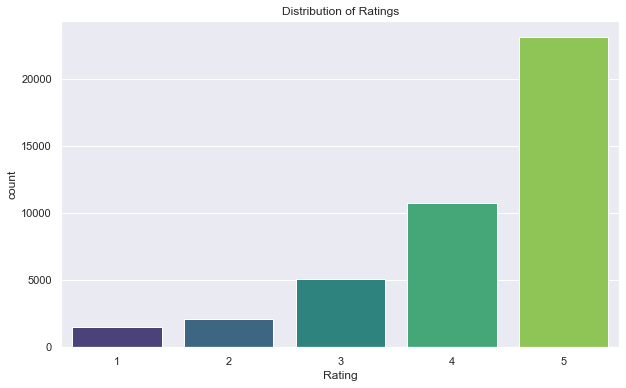

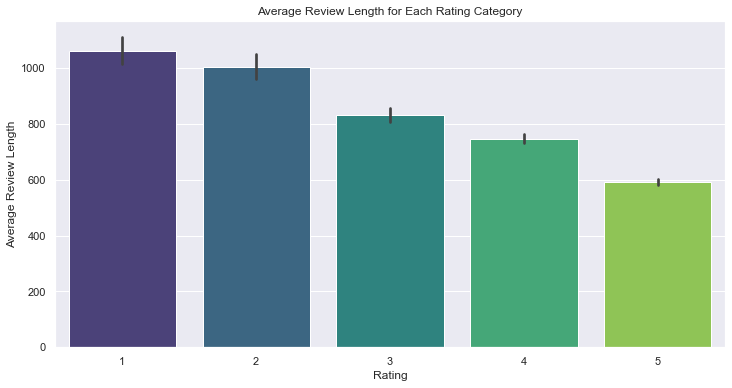

In [55]:
# Question 1: Explore the distribution of ratings and the average review length for each rating category
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.show()

# Calculate the length of each review and create a new column 'Review_Length'
df['Review_Length'] = df['Review_Text'].apply(lambda x: len(str(x)))

# The x-axis represents the different rating categories, and the y-axis represents the average review length.
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Review_Length', data=df, palette='viridis')
plt.title('Average Review Length for Each Rating Category')
plt.xlabel('Rating')
plt.ylabel('Average Review Length')
plt.show()

Conclusion: In these two histograms, a distinct upward trend is evident in the number of reviews corresponding to scores from 1 to 5. Surprisingly, there is a discernible decreasing trend in the length of average review length from 1 to 5 across different rating categories. While the majority of visitors express satisfaction with their Disneyland park experience, it is notable that people tend to provide more extensive reviews when the experience falls short of their expectations.

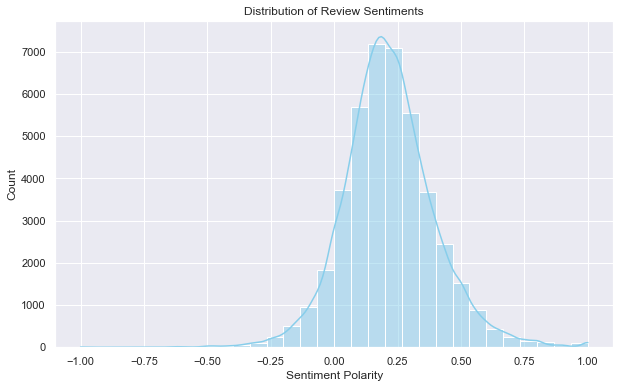

In [56]:
#Question 2: Explore the distribution of review sentiments

from textblob import TextBlob

df['Sentiment'] = df['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

#The x-axis can represent the sentiment polarity values, and the y-axis can represent the frequency or density of reviews at each sentiment level.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sentiment', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

Background knowledge of overall sentiment tendency:
If it is relatively symmetrical around the peak, it suggests a balanced mix of positive and potentially neutral sentiments. A right skewness indicates that the majority of reviews are positive, while a left skewness suggests a prevalence of negative sentiments.

Conclusion: This information suggests that a significant portion of the Disneyland reviews tends to be positive. The notable peak around 0.20 indicates that a considerable number of reviews express a positive sentiment. A sentiment polarity of 0.20 generally indicates a moderately positive tone.

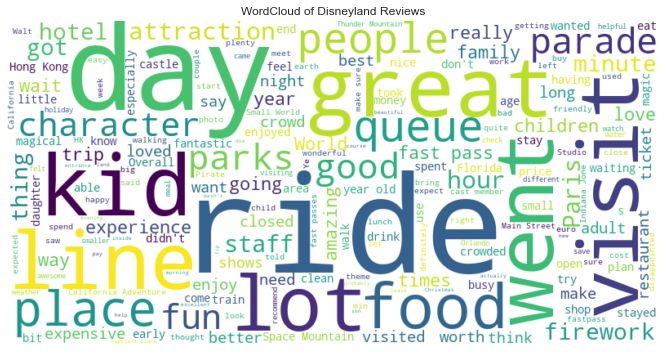

In [85]:
# Question 3: Explore the most common words in reviews using word clouds

# Import necessary libraries
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Combine all reviews into a single string
all_reviews = ' '.join(df['Review_Text'].dropna())

# Generate the WordCloud
wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS.union(["disneyland", "park", "disney", "just", "like", "time", "did"]), 
                      background_color='white', width=800, height=400).generate(all_reviews)

# Plot the WordCloud image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Disneyland Reviews')
plt.show()

In [81]:
#Most Common Words
print("\n",
      "\n",text.count("ride"),
      "\n",text.count("day"),
      "\n",text.count("visit"),
      "\n",text.count("kid"),
      "\n",text.count("line"),
      "\n",text.count("great"),
      "\n",text.count("food"),
      "\n",text.count("parade"),
      "\n",text.count("character"),
      "\n",text.count("attraction"),
     )


 
 52619 
 48174 
 20743 
 16238 
 16154 
 15210 
 12776 
 10576 
 9416 
 9152


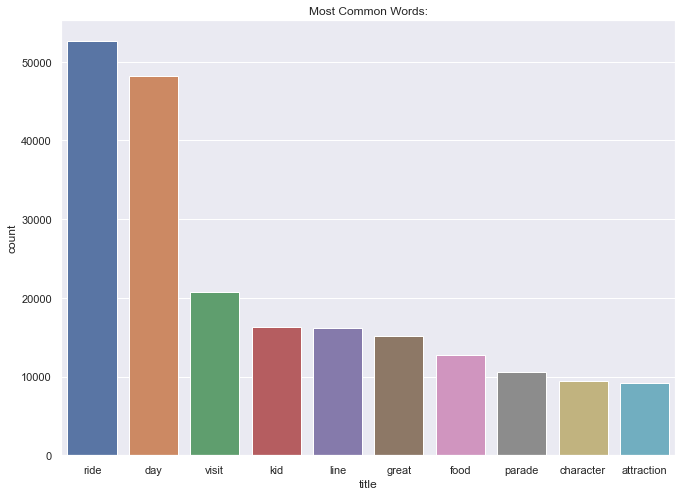

In [82]:
data = {
    "title": ["ride", "day" ,"visit", "kid", "line", "great", 
              "food","parade","character", "attraction"],
    "count": [52619, 48174, 20743, 16238, 16154, 15210, 12776, 10576, 9416, 9152],
}

data = pd.DataFrame(data)
data.head(10)

#Create the barplot
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

Conclusion: The WordCloud illustrates the most frequently mentioned words in Disneyland reviews. Larger words in the WordCloud indicate higher frequencies. "Ride" is the most commonly mentioned term, suggesting a strong association with discussions about various Disneyland rides, including lines, parades, and characters. Many reviews highlight experiences related to children, emphasizing Disneyland's family-friendly appeal. Positive sentiments are expressed, with the frequent use of terms like "great" and "attraction" in reviews, indicating overall satisfaction with the Disneyland experience.